In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import xgboost as xgb

import sys
import pickle
import time
import os
sys.path.append('../')
import lib.tools as tools

pd.options.display.max_columns = 50
raw_path = '../data/raw/'
train_path = '../data/train/'

/home/greg/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/greg/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
models = dict()
for i in range(1,37):
    models[i] =  xgb.XGBRegressor(max_depth=3, learning_rate=0.1, nthread=3, )
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, nthread=3, )

In [3]:
def ts_split(index_series, n_splits=4):
    len_split = len(index_series) // n_splits
    return [len_split * split_number + index_series[0] for split_number in xrange(1,n_splits)]

In [4]:
results = []
preds = []

In [5]:
start = time.localtime()
x_total = None
y_total = None

# Epoch
for filenumber in range(1,36+1):
    filename = 'train_' + str(filenumber) + '.csv'
    
    data = pd.read_csv(train_path + filename, header=0, delimiter=';')
    if x_total is not None:
        data.index = data.index + (x_total.index[-1] + 1)
        
    y = pd.DataFrame(data.tH2_obs)
    x = data.drop(['tH2_obs', 'date'], axis=1)
    x_total = pd.concat([x_total, x], axis=0, ignore_index=True)
    y_total = pd.concat([y_total, y], axis=0, ignore_index=True)
    
    # Batch
    for split_index in ts_split(data.index):
        x_train, x_test = x_total.iloc[:split_index,:], x_total.iloc[split_index:,:]
        y_train, y_test = y_total.iloc[:split_index,:], y_total.iloc[split_index:,:]
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        result = np.sqrt(mean_squared_error(y_test, pred))

        preds.append(pred)
        results.append(result)
    print(filename + ' - RMSE: %.4f'%result)
    
    #Checkpoint
    modelname = 'xgb'
    for date_info in start[:5]:
        modelname += '_' + str(date_info)
    
    if not os.path.exists('../model/'):
        os.mkdir('../model/')
    tools.save_to_pickle('../model/' + modelname + '.pkl', model)


train_1.csv - RMSE: 0.9496
train_2.csv - RMSE: 0.9335
train_3.csv - RMSE: 0.9665
train_4.csv - RMSE: 1.0062
train_5.csv - RMSE: 1.0102
train_6.csv - RMSE: 1.0276
train_7.csv - RMSE: 1.0595
train_8.csv - RMSE: 1.1271
train_9.csv - RMSE: 1.1643
train_10.csv - RMSE: 1.1994
train_11.csv - RMSE: 1.2604
train_12.csv - RMSE: 1.3067
train_13.csv - RMSE: 1.3223
train_14.csv - RMSE: 1.2900
train_15.csv - RMSE: 1.3075
train_16.csv - RMSE: 1.2374
train_17.csv - RMSE: 1.2135
train_18.csv - RMSE: 1.1336
train_19.csv - RMSE: 1.1166
train_20.csv - RMSE: 1.1423
train_21.csv - RMSE: 1.1521
train_22.csv - RMSE: 1.1706
train_23.csv - RMSE: 1.1844
train_24.csv - RMSE: 1.2103
train_25.csv - RMSE: 1.2455
train_26.csv - RMSE: 1.2334
train_27.csv - RMSE: 1.2617
train_28.csv - RMSE: 1.2913
train_29.csv - RMSE: 1.2993
train_30.csv - RMSE: 1.3068
train_31.csv - RMSE: 1.2225
train_32.csv - RMSE: 1.1970
train_33.csv - RMSE: 1.2942
train_34.csv - RMSE: 1.3675
train_35.csv - RMSE: 1.3895
train_36.csv - RMSE: 1.4251


In [7]:
x_total.to_csv('../model/x' + modelname[3:] + '.csv', sep=';')
y_total.to_csv('../model/y' + modelname[3:] + '.csv', sep=';')

In [6]:
print(os.listdir('../model/'))
# model_path = '../model/' + os.listdir('../model/')[-1]
# model = tools.load_pickle(model_path)

['xgb_2018_2_13_10_4.pkl']


<IPython.core.display.Javascript object>


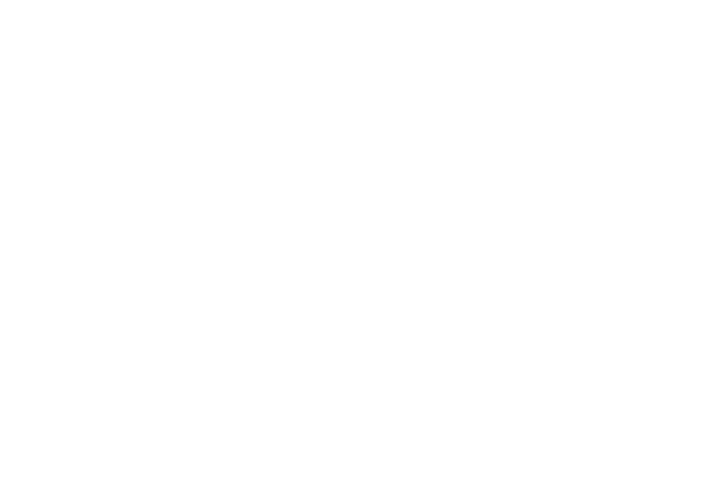

<IPython.core.display.Javascript object>


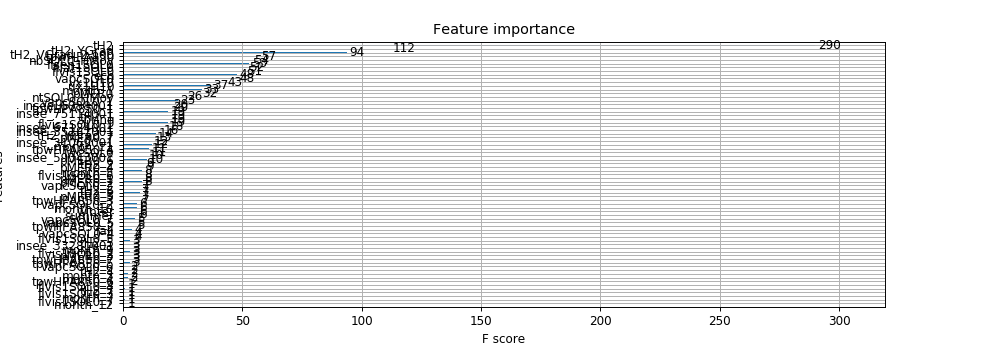

In [8]:
%matplotlib notebook
plt.figure(dpi=100)
xgb.plot_importance(model, )

plt.show()

# Load model and see perf

In [3]:
model_path = '../model/' + os.listdir('../model/')[0]
model = tools.load_pickle(model_path)

In [9]:
validation_data = pd.read_csv('../data/test/test.csv', header=0, parse_dates=['date'], delimiter=';', 
                              index_col='date', )
validation_ = tools.processing(validation_data)
val_pred = model.predict(validation_)

AssertionError: Months missing

In [5]:
import pandas as pd
t = pd.read_csv('../data/raw/train_1.csv', header=0, delimiter=';', parse_dates=['date'], index_col='date')

In [6]:
len(t.columns.values)

30